<a href="https://colab.research.google.com/github/cristianmejia00/kajikawa_lab/blob/master/Python-2021/Practice_3_titech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methodology of Mathematical and Computational Analysis II  
Graduate Major in Technology and Innovation Management  
Tokyo Institute of Technology  
2021 - Q2  
Class 3, Programming exercise 1  

Sasahara Kazutoshi, Mejia Cristian  
contact: `mejia.c.aa@m.titech.ac.jp`

---

### Network analysis with Python

[NetworkX](https://networkx.org/documentation/stable/index.html) and [Igraph](https://igraph.org/python/) are Python packages for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. They provide tools for:  

* the study of the structure and dynamics of social, biological, and infrastructure networks; 
* working with large data sets; 
* generating many types of random and classic networks,
* analyzing network structure, build network models, design new network algorithms, 
* drawing networks, etc.  

Both NetworkX and Igraph are capable of doing most of the same computations but they also have some differences. For intance, NetworkX is more declarative with function names that are easier to understand. On the other hand, Igraph has better options for plotting and clustering. Here, we are using both packages. 

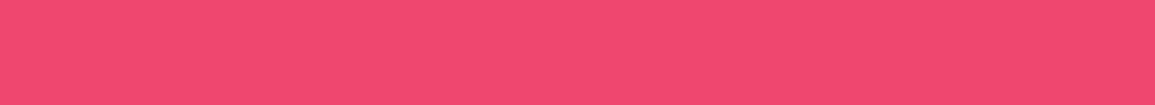

## Part 1: Network representation  

As usual, we start by importing the necessary packages. 

Then, we plot a sample network. 

There are many ways to create networks. The most common representation are:
* Adjacency lists
* Adjacency matrices
* Edge lists

In this part, we are going to recreate the same sample network using the three representations above.

In [1]:
!pip install wget
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import wget


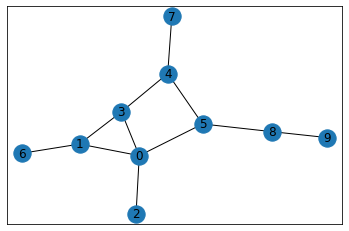

In [2]:
# Sample network
G1 = nx.Graph()

# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
np.random.seed(1234)
nx.draw_networkx(G1)

### Adjacency List

G_adjlist.txt is the adjaceny list representation of G1.

It can be read as follows:

* 0 1 2 3 5  →  node 0 is adjacent to nodes 1, 2, 3, 5  
* 1 3 6  →  node 1 is (also) adjacent to nodes 3, 6  
* 2  →  node 2 is (also) adjacent to no new nodes  
* 3 4  →  node 3 is (also) adjacent to node 4  

and so on. Note that adjacencies are only accounted for once (e.g. node 2 is adjacent to node 0, but node 0 is not listed in node 2's row, because that edge has already been accounted for in node 0's row).


In [3]:
wget.download('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/G_adjlist.txt')
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

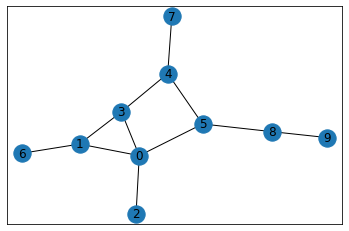

In [4]:
# draw the network G2
np.random.seed(1234)
nx.draw_networkx(G2)

### Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row 0, column 1 corresponds to the edge between node 0 and node 1.  

Reading across row 0, there is a '1' in columns 1, 2, 3, and 5, which indicates that node 0 is adjacent to nodes 1, 2, 3, and 5  

In [5]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

If we convert the adjacency matrix to a networkx graph using nx.Graph, we can see that it matches G1.

In [6]:
G3 = nx.Graph(G_mat)
G3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

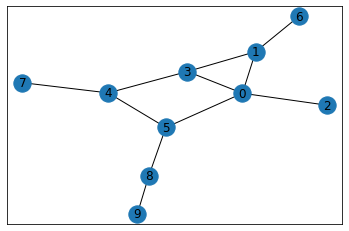

In [7]:
# draw the network G3
np.random.seed(1234)
nx.draw_networkx(G3)

### Edgelist   

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns. Looking at `G_edgelist.txt` this is the same as the original graph `G1`, but now each edge has a weight. 

For example, from the first row, we can see the edge between nodes `0` and `1`, has a weight of `4`.


Using read_edgelist and passing in a list of tuples with the name and type of each edge attribute will create a graph with our desired edge attributes.

In [8]:
wget.download('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/G_edgelist.txt')
G4 = nx.read_edgelist('G_edgelist.txt', data=[('weight', int)])
G4.edges()

EdgeView([('0', '1'), ('0', '2'), ('0', '3'), ('0', '5'), ('1', '3'), ('1', '6'), ('3', '4'), ('5', '4'), ('5', '8'), ('4', '7'), ('8', '9')])

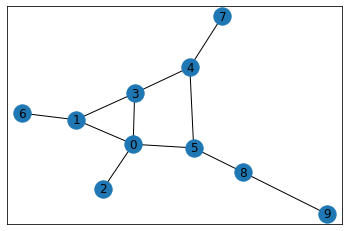

In [9]:
np.random.seed(1234)
nx.draw_networkx(G4)

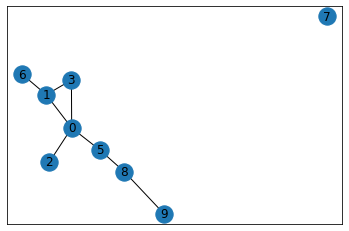

In [10]:
G4.remove_node('4')

# draw the network G4 with node 4 removed
np.random.seed(1234)
nx.draw_networkx(G4)

### Example: a small social network

We are going to use the edgelist to represent a network of friends.  

We have the name, age, and gender of 7 individuals. Two individuals are connected if they are friends. We also know how many years they have been friends (1 or 2 years).  

This time we are using pandas dataframes as they are more useful to see our data. 

In [11]:
# Read the nodes (i.e. the persons)
nodes_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/example1-nodes.csv')
nodes_df

,index,name,age,gender,color
0,0,Alice,25,f,orange
1,1,Bob,31,m,gray
2,2,Claire,18,f,orange
3,3,Dennis,47,m,gray
4,4,Esther,22,f,orange
5,5,Frank,23,m,gray
6,6,George,50,m,gray


In [12]:
# Read the edges (i.e. their relationship)
edges_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/example1-edges.csv')
edges_df

,source,target,weight
0,0,1,1
1,0,2,1
2,2,3,2
3,3,4,2
4,4,2,2
5,2,5,1
6,5,0,2
7,6,3,1
8,5,6,1


In [13]:
# Create a network from the Pandas dataframe
G5 = nx.from_pandas_edgelist(edges_df, 'source', 'target', edge_attr='weight')

In [14]:
# Add the individual's information as node attributes
node_attr = nodes_df.set_index('index').to_dict('index')
nx.set_node_attributes(G5, node_attr)

G5.nodes[0]

{'age': 25, 'color': 'orange', 'gender': 'f', 'name': 'Alice'}

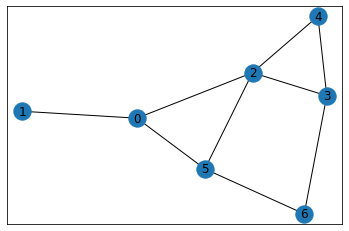

In [15]:
# visualize the network
np.random.seed(1234)
nx.draw_networkx(G5)

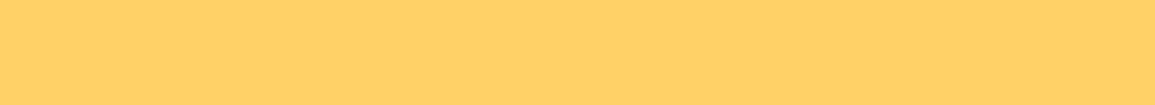

## Part 2: Network visualization  

The above example was visualized using the native functions of NetworkX.  From now on, we are going to use the Igraph package instead, because it offers more control over the image.  



In [16]:
# First, let's install the necessary packages
!pip install cairocffi
!pip install python-igraph

     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp37-none-any.whl size=89563 sha256=53fc432c8d9b38eb8cae48729da75fccb4840e320409d35bb0f29f87465eb7ed
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi
     |████████████████████████████████| 3.2MB 8.5MB/s 


In [17]:
# Setup Igraph
import igraph as ig
from igraph import Graph

# Convert from NetworkX to Igraph
g = Graph.from_networkx(G5)

### Basic visualization

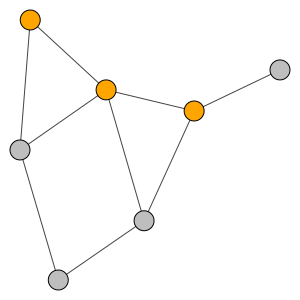

In [18]:
# Visualize the network
ig.plot(g, bbox=(300, 300))

### Styling the network  

for more options see the official [documentation](
https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots).

When applying colors we can use any of the valid color names show in [this list](https://en.wikipedia.org/wiki/X11_color_names#Color_name_chart). Be careful with the spelling, and use only lowercase.  

Networks can be visualized by applying different layout algorithms. Some reccomended ones are:  
For large networks:  
* "lgl"
* "drl"   

Popular layouts:
* "fruchterman_reingold"
* "kamada_kawai"  

In this example the network is too small for using layout, so we wont notice the difference. Please try them with the larger networks that follow in this tutorial.

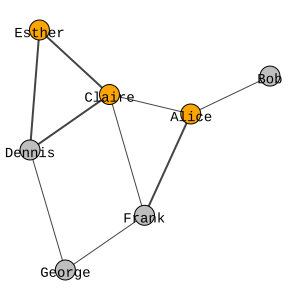

In [19]:
# Styling the network

# Initialize the style
visual_style = {}

# Vertex style
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_color"] = g.vs["color"]

# Edges style
visual_style["edge_width"] = g.es["weight"]

# Drawing style
visual_style["layout"] = "kamada_kawai"
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 30

# Plotting the network
ig.plot(g, **visual_style)

🔴 #1
#### Your turn!  

Plot the network again. This time:

* Make the vertices have a size based on their age   
* Check the [documentation](
https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots) and make the edge curved

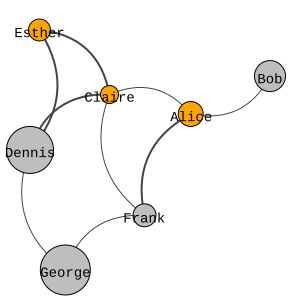

In [20]:
# Styling the network

# Initialize the style
visual_style = {}

# Vertex style
visual_style["vertex_size"] = g.vs["age"]
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_color"] = g.vs["color"]

# Edges style
visual_style["edge_width"] = g.es["weight"]
visual_style["edge_curved"] = True

# Drawing style
visual_style["layout"] = "kamada_kawai"
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 30

# Plotting the network
ig.plot(g, **visual_style)

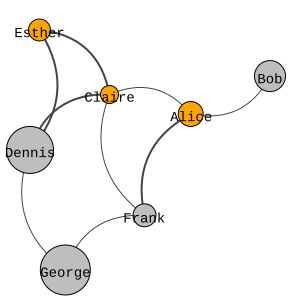

In [21]:
# Save the image as a file
# Supported extensions: PDF, PNG, SVG
ig.plot(g, target='my_network.pdf', **visual_style)

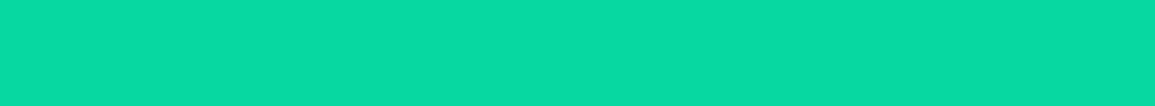

## Part 3: Network properties and basic analysis

In this part we are going to compute values related to the network and its nodes.



### Node and edges counts

In [22]:
# Get the number of nodes
g.vcount()

7

In [23]:
# Get the number of edges
g.ecount()

9

In [24]:
# Get the neighbors of node 0 (i.e. "Alice")
g.neighbors(0)

[1, 2, 5]

In [25]:
g.neighbors("Alice")

[1, 2, 5]

In [26]:
# Get the degree of "Alice"
g.degree("Alice")

3

### Meassures of centralities  

These serve as indicator of the relevance of the node
* Degree
* Betweenness centrality
* Closeness centrality
* Page Rank  

There are [other centralities](https://igraph.org/python/doc/tutorial/analysis.html#vertex-properties) too.

In [27]:
# Get the degree of all nodes in the network
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [28]:
# Add the degrees as a node attribute
g.vs["degree"] = g.degree()
g.vs["degree"]

[3, 1, 4, 3, 2, 3, 2]

In [29]:
# Who is the person with the highes degree?
g.vs.select(_degree=g.maxdegree())["name"]

['Claire']

In [30]:
# Who are the persons with an age of less than 25 y.o.
g.vs.select(age_lt=25)["name"]

['Claire', 'Esther', 'Frank']

🔴 #2
#### Your turn!  
Find all the women in the network

In [31]:
g.vs.select(gender_eq="f")["name"]

['Alice', 'Claire', 'Esther']

In [32]:
# Get the betweenness centrality of all the nodes
g.betweenness()

[5.0, 0.0, 5.5, 1.5, 0.0, 2.5, 0.5]

In [33]:
# Who has the largest betweeness centrality?
g.vs.select(_betweenness_eq = max(g.betweenness()))["name"]

['Claire']

In [34]:
# Get the closeness centrality
g.closeness()

[0.6666666666666666,
 0.42857142857142855,
 0.75,
 0.6,
 0.5454545454545454,
 0.6666666666666666,
 0.5454545454545454]

In [35]:
# Compute the page rank of the nodes
g.pagerank()

[0.1715187083669299,
 0.07002553879920158,
 0.20933537164407268,
 0.16151684644322287,
 0.11167544439518333,
 0.16265174994590004,
 0.11327634040548959]

### Pathfinding

In [36]:
# How many edges between two nodes?
g.shortest_paths("George", "Bob")

[[3]]

In [37]:
# Find the shortest route between a pair of nodes
g.get_shortest_paths("George", "Bob")

[[6, 5, 0, 1]]

In [38]:
# What is the largest distance in the network?
g.farthest_points()

(1, 3, 3)

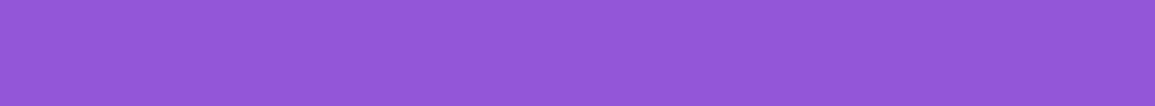

## Part 4: Network clustering

In this part, we are going to find the components and clusters of the network.  

* **Components** are groups of connected nodes. Every group of nodes "floating around" is a component. Isolated indivicual nodes are also components. 

* **Clusters** are groups of nodes that share more connections among them in relation to other clusters in the network. Clusters are also called "communities".  



### Example: a larger social network

Now, let's use a larger network. This is also a social network showing a list of individuals (name, age, and gender). Two individuals are connected if they appear in the same photo. The more photos they share together the more likely they may be friends.  

In this exercise we are observing clusters of friends.

In [39]:
# Load the full dataset
edges_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/example2-edges.csv')
nodes_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/example2-nodes.csv')

# Create the network using the edges_df
g2 = nx.from_pandas_edgelist(edges_df, 'source', 'target', edge_attr='weight')

# Add node attributes using the nodes_df
nodes_df = nodes_df.set_index('index').to_dict('index')
nx.set_node_attributes(g2, nodes_df)

# Convert to Igraph
g2 = Graph.from_networkx(g2)

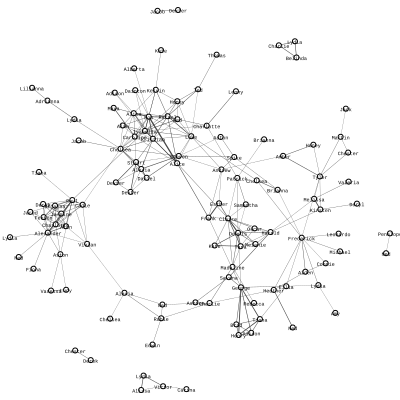

In [40]:
# Styling the graph

# Initialize the style
visual_style = {}

# Vertex style
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = "white" #g2.vs["color"]
visual_style["vertex_label"] = g2.vs["name"]
visual_style["vertex_label_size"] = 5

# Edges style
visual_style["edge_width"] = [int(weight) / 100 for weight in g2.es["weight"]]

# Drawing style
#visual_style["layout"] = "lgl"
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 10

# Plotting the network
random.seed(1234)
ig.plot(g2, **visual_style, target="my_network_full.pdf")

🔴 #3
#### Your turn!  
Who is the person with the highest degree?

In [41]:
g2.vs.select(_degree=max(g2.degree()))["name"]

['Isabella']

🔴 #4
#### Your turn!  
How much is that degree?

In [42]:
#g2.degree("Isabella")
max(g2.degree())

16

### Components

In [43]:
# Compute the components
components = g2.components()

# Number of components in the network
components.summary()

'Clustering with 115 elements and 6 clusters'

In [44]:
# Size of the components
components.sizes()

[102, 2, 4, 3, 2, 2]

In [45]:
# What component is Jacob in?
components.membership[g2.vs.find("Jacob").index]

1

In [46]:
# List of nodes for each component
#components[0]
g2.vs(components[1])["name"]

['Jacob', 'Dexter']

### Clusters

Some common clustering algorithms are:
* Graph.community_leiden()
* Graph.community_multilevel()
* Graph.community_infomap()
* Graph.community_fastgreedy()

In Igraph, components and clusters are computed similarly. We just need to use the appropriate function.

In [48]:
# Compute the clusters
clusters = g2.community_multilevel()

# Number of clusters in the network
clusters.summary()

'Clustering with 115 elements and 12 clusters'

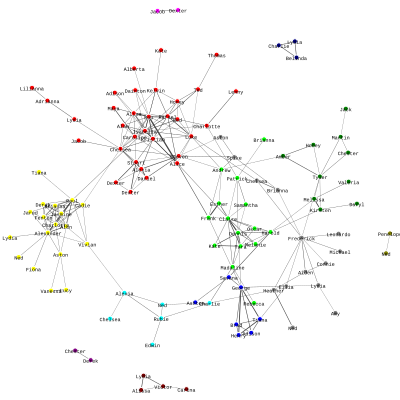

In [49]:
# Visualizing clusters

# Initialize the style
visual_style = {}

# Vertex style
visual_style["vertex_size"] = 5
visual_style["vertex_label"] = g2.vs["name"]
visual_style["vertex_label_size"] = 5
visual_style["vertex_frame_color"] ='white'

# Using default colors
list_of_colors = ig.drawing.colors.ClusterColoringPalette(len(clusters))
visual_style["vertex_color"] = list_of_colors.get_many(clusters.membership)

# Or using custom colors
#custom_colors = ['red','blue','green','cyan','pink','orange','grey','yellow','white','black','purple', 'rosy brown', 'plum', 'royal blue']
#visual_style["vertex_color"] = [custom_colors[i] for i in clusters.membership]

# Edges style
visual_style["edge_width"] = [int(weight) / 100 for weight in g2.es["weight"]]

# Drawing style
#visual_style["layout"] = "lgl"
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 10

# Plotting the network
random.seed(1234)
ig.plot(g2, **visual_style, target="my_network_clusters.pdf")

In [50]:
# Size of clusters
clusters.sizes()

[32, 15, 7, 18, 2, 6, 14, 4, 10, 3, 2, 2]

In [51]:
# What cluster is Alice in?
clusters.membership[g2.vs.find("Alice").index]

0

In [52]:
# List of all the persons sharing in the same cluster with Alice
#clusters[0]
g2.vs(clusters[0])["name"]

['Alice',
 'Bob',
 'Honey',
 'Ned',
 'Isabella',
 'Luke',
 'Rafael',
 'Kristian',
 'Charlotte',
 'Adrianna',
 'Lilianna',
 'Lydia',
 'Chelsea',
 'Jacob',
 'Stuart',
 'Steven',
 'Caroline',
 'Alan',
 'Daniel',
 'Alexia',
 'Alisa',
 'Dainton',
 'Ted',
 'Kelvin',
 'Alberta',
 'Maya',
 'Kate',
 'Dexter',
 'Adison',
 'Lenny',
 'Thomas',
 'Dexter']

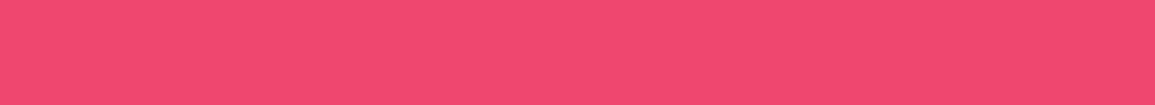

## Part 5: Exercise

Finally, we are going to analyze a different kind of network.  

We are going to study the most cited academic literature from researchers in the Tokyo Institute of Technology.  

We have the dataset of the most cited 500 academic papers written by Titech researchers. Then, **we want to know what are the "topics" of these papers.** 

To do so, we are going to use a "Keyword co-occurrence" network. In the network:
* Nodes are keywords that appeared in the titles or abstracts of the papers.
* Two keywords are connected if they appeared in the same paper. The more papers they appear together, the more related they are.  

If we find **clusters of keywords**, then we will know the topics of the most cited articles from Titech (without reading the papers!)

Note: Irrelevant and meaningless keywords were removed from the data. (e.g. "and", "the", "this")


In [61]:
# Load the full dataset
edges_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/titech_topics_edges.csv')
nodes_df = pd.read_csv('https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/titech_topics_nodes.csv')

# Create the network using the edges_df
g3 = nx.from_pandas_edgelist(edges_df, 'source', 'target', edge_attr='weight')

# Add node attributes using the nodes_df
nodes_df = nodes_df.set_index('index').to_dict('index')
nx.set_node_attributes(g3, nodes_df)

# Convert to Igraph
g3 = Graph.from_networkx(g3)

🔴 #5
#### Your turn!  
How many nodes (i.e. keywords) are in the network?

In [62]:
g3.vcount()

172

🔴 #6
#### Your turn!  
how many components?

In [63]:
components = g3.components()
components.summary()

'Clustering with 172 elements and 1 clusters'

🔴 #7
#### Your turn!  
Compute clusters using the multilevel algorithm.

In [64]:
clusters = g3.community_multilevel()

🔴 #8
#### Your turn!  
How many clusters were found?

In [65]:
clusters.summary()

'Clustering with 172 elements and 8 clusters'

🔴 #9
#### Your turn!  
Visualize the network with the clusters colored.

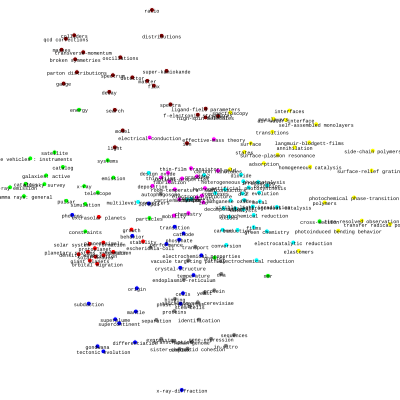

In [70]:
# Initialize the style
visual_style = {}

# Vertex style
visual_style["vertex_size"] = 5
visual_style["vertex_label"] = g3.vs["name"]
visual_style["vertex_label_size"] = 5
visual_style["vertex_frame_color"] ='white'

# Using default colors
list_of_colors = ig.drawing.colors.ClusterColoringPalette(len(clusters))
visual_style["vertex_color"] = list_of_colors.get_many(clusters.membership)

# Edges style
visual_style["edge_width"] = [int(weight) / 100 for weight in g3.es["weight"]]
visual_style["edge_curved"] = True

# Drawing style
#visual_style["layout"] = "lgl"
visual_style["bbox"] = (400, 400)
visual_style["margin"] = 10

# Plotting the network
random.seed(1234)
ig.plot(g3, **visual_style, target="titech_topic_network_clusters.pdf")

🔴 #10
#### Your turn!  
Visually check the network. Based on the clusters, 
what are the top research topics of the Tokyo Institute of Technology?

In [69]:
# Or we can check the contents of each cluster:
g3.vs(clusters[0])["name"]

['accretion',
 'density waves',
 'evolution',
 'extrasolar planets',
 'giant planets',
 'growth',
 'orbital migration',
 'planetary systems : formation',
 'planetesimals',
 'protoplanet',
 'solar nebula',
 'solar system : formation',
 'stability']

---

## References  

* NetworkX [documentation](https://networkx.org/documentation/stable/tutorial.html)
* Igraph [documentation](https://igraph.org/python/doc/tutorial/tutorial.html)
* University of Michigan's [Applied Social Network Analysis in Python](https://www.coursera.org/learn/python-social-network-analysis) Course by Daniel Romero
* University of Michigan's [Social Network Analysis](https://github.com/ladamalina/coursera-sna) Course by Lada Adamic
* "[Network graph with louvain algorithm](https://www.kaggle.com/lsjsj92/network-graph-with-louvain-algorithm?select=stack_network_nodes.csv)" a Kaggle notebook by leesoojin

## Data
* [Random data generator](http://www.randat.com/)
* [Web of Science Core Collection](https://apps.webofknowledge.com/) You searched for: ORGANIZATION-ENHANCED: (Tokyo Institute of Technology)
Timespan: All years. Indexes: SCI-EXPANDED, SSCI, CPCI-S, CPCI-SSH, BKCI-S, BKCI-SSH, ESCI, CCR-EXPANDED, IC. 
* [VosViewer](https://www.vosviewer.com/)